In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load Processed Data
input_path = "../data/processed_amazon_products.csv"
output_dir = "../reports/eda"

os.makedirs(output_dir, exist_ok=True)

# Load dataset
df = pd.read_csv(input_path)
print("Data loaded:", df.shape)
df.head()


Data loaded: (42675, 21)


,title,rating,number_of_reviews,bought_in_last_month,current/discounted_price,price_on_variant,listed_price,is_best_seller,is_sponsored,is_couponed,...,delivery_details,sustainability_badges,image_url,product_url,collected_at,discount,brand,collected_month,collected_day,collected_year
0,BOYA BOYALINK 2 Wireless Lavalier Microphone f...,4.6,375,300.0,89.68,basic variant price: 2.4GHz,159.00,0,0,0,...,"Delivery Mon, Sep 1",Carbon impact,https://m.media-amazon.com/images/I/71pAqiVEs3...,/sspa/click?ie=UTF8&spc=MTo4NzEzNDY2NTQ5NDYxND...,2025-08-21 11:14:29,69.32,BOYA,8,21,2025
1,"LISEN USB C to Lightning Cable, 240W 4 in 1 Ch...",4.3,2457,0.0,9.99,basic variant price: nan,15.99,0,0,0,...,"Delivery Fri, Aug 29",NaN,https://m.media-amazon.com/images/I/61nbF6aVIP...,/sspa/click?ie=UTF8&spc=MTo4NzEzNDY2NTQ5NDYxND...,2025-08-21 11:14:29,6.00,LISEN,8,21,2025
2,"DJI Mic 2 (2 TX + 1 RX + Charging Case), Wirel...",4.6,3044,0.0,314.00,basic variant price: nan,349.00,0,0,0,...,"Delivery Mon, Sep 1",NaN,https://m.media-amazon.com/images/I/61h78MEXoj...,/sspa/click?ie=UTF8&spc=MTo4NzEzNDY2NTQ5NDYxND...,2025-08-21 11:14:29,35.00,DJI,8,21,2025
3,"Apple AirPods Pro 2 Wireless Earbuds, Active N...",4.6,35882,0.0,77.00,basic variant price: $162.24,59.99,0,0,0,...,NaN,NaN,https://m.media-amazon.com/images/I/61SUj2aKoE...,/Apple-Cancellation-Transparency-Personalized-...,2025-08-21 11:14:29,-17.01,Apple,8,21,2025
4,Apple AirTag 4 Pack. Keep Track of and find Yo...,4.8,28988,0.0,77.00,basic variant price: $72.74,59.99,0,0,0,...,NaN,NaN,https://m.media-amazon.com/images/I/61bMNCeAUA...,/Apple-MX542LL-A-AirTag-Pack/dp/B0D54JZTHY/ref...,2025-08-21 11:14:29,-17.01,Apple,8,21,2025


1. Histograms
- Ratings distribution.
- Prices (listed_price, discounted_price).
- Sales (bought_in_last_month).

2. Correlation Heatmap
- Between numeric features: rating, number_of_reviews, price, sales.

3. Best Seller Distribution
- Countplot: Best Seller vs Non-Best Seller.






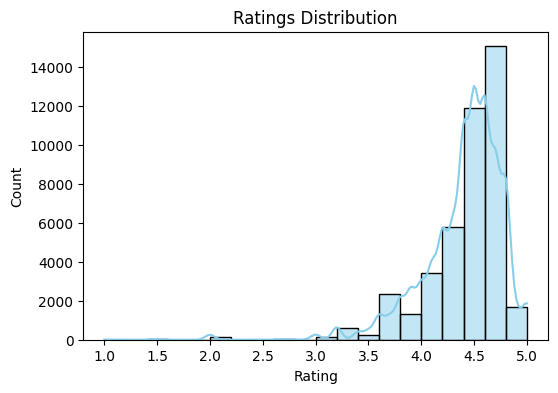

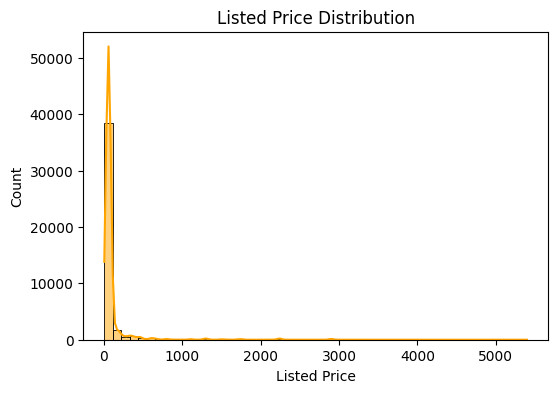

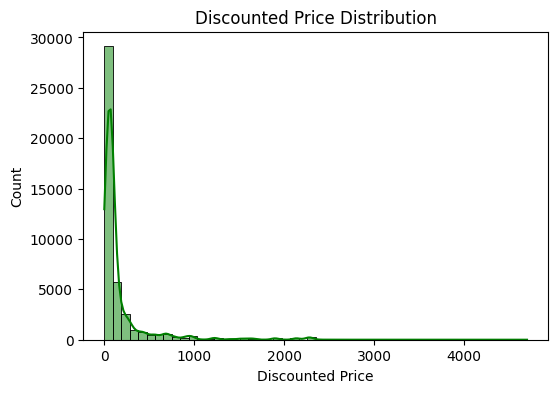

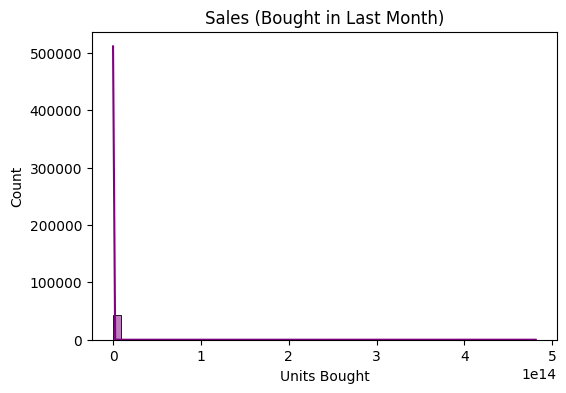

In [12]:

# Histograms
plt.figure(figsize=(6,4))
sns.histplot(df["rating"], bins=20, kde=True, color="skyblue")
plt.title("Ratings Distribution")

plt.xlabel("Rating")
plt.ylabel("Count")

plt.savefig(f"{output_dir}/ratings_distribution.png", dpi=300, bbox_inches="tight")
plt.show()
# ---------------------------------------------------------------
# ---------------------------------------------------------------
# ---------------------------------------------------------------

plt.figure(figsize=(6,4))
sns.histplot(df["listed_price"], bins=50, kde=True, color="orange")
plt.title("Listed Price Distribution")

plt.xlabel("Listed Price")
plt.ylabel("Count")

plt.savefig(f"{output_dir}/listed_price_distribution.png", dpi=300, bbox_inches="tight")
plt.show()

# ---------------------------------------------------------------
# ---------------------------------------------------------------
# ---------------------------------------------------------------

plt.figure(figsize=(6,4))
sns.histplot(df["current/discounted_price"], bins=50, kde=True, color="green")
plt.title("Discounted Price Distribution")

plt.xlabel("Discounted Price")
plt.ylabel("Count")
plt.savefig(f"{output_dir}/discounted_price_distribution.png", dpi=300, bbox_inches="tight")
plt.show()

# ---------------------------------------------------------------
# ---------------------------------------------------------------
# ---------------------------------------------------------------

plt.figure(figsize=(6,4))
sns.histplot(df["bought_in_last_month"], bins=50, kde=True, color="purple")
plt.title("Sales (Bought in Last Month)")

plt.xlabel("Units Bought")
plt.ylabel("Count")
plt.savefig(f"{output_dir}/sales_distribution.png", dpi=300, bbox_inches="tight")
plt.show()


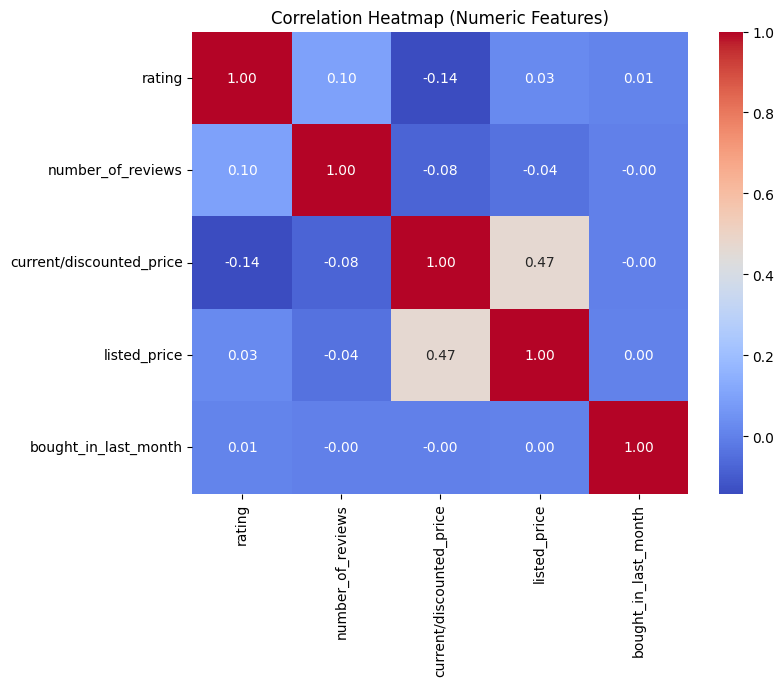

In [13]:
# Correlation Heatmap
# Select numeric features
num_features = ["rating", "number_of_reviews", "current/discounted_price", "listed_price", "bought_in_last_month"]

corr = df[num_features].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)")

plt.savefig(f"{output_dir}/correlation_heatmap.png", dpi=300, bbox_inches="tight")
plt.show()


/tmp/ipykernel_15799/3864908869.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="is_best_seller", data=df, palette="Set2")


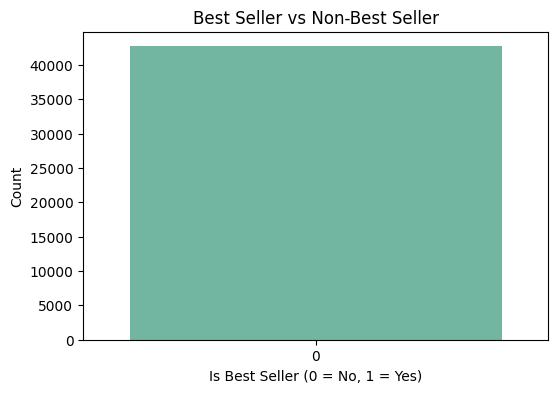

In [4]:
# Best Seller Distribution
plt.figure(figsize=(6,4))
sns.countplot(x="is_best_seller", data=df, palette="Set2")
plt.title("Best Seller vs Non-Best Seller")

plt.xlabel("Is Best Seller (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.savefig(f"{output_dir}/best_seller_distribution.png", dpi=300, bbox_inches="tight")
plt.show()


In [14]:
# Save Confirmation
print(f"All plots saved to {output_dir}/")


All plots saved to ../reports/eda/
